In [1]:
import sys
sys.path.insert(1, '/home/jovyan/home/tools')
sys.path.insert(1, '/home/jovyan/home/tools/abg_python')
sys.path.insert(1, '/home/jovyan/home/projects/massive-halos/scripts')
sys.path.insert(1, '/home/jovyan/home/tools/FIRE_studio')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from halo_analysis_scripts import load_p0_allsnaps, CCA_sims, redshifts_snapshots
from firestudio.studios.gas_studio import GasStudio
%matplotlib inline

palettable colormaps are not installed
don't have phil's colormaps
missing firefly api


In [9]:
redshifts_snapshots(CCA_sims['push']['h206'])

array([9.90000000e+01, 9.99999890e+00, 9.00000000e+00, 8.00000090e+00,
       7.00000000e+00, 6.00000210e+00, 5.77419573e+00, 5.63157678e+00,
       5.42856959e+00, 5.17646913e+00, 4.99999880e+00, 4.77981561e+00,
       4.57522060e+00, 4.38461497e+00, 4.20661136e+00, 4.00000000e+00,
       3.88549618e+00, 3.81203008e+00, 3.70588235e+00, 3.60431655e+00,
       3.50704225e+00, 3.41379310e+00, 3.29530201e+00, 3.21052632e+00,
       3.10256410e+00, 3.00000000e+00, 2.89999934e+00, 2.80487823e+00,
       2.69230815e+00, 2.60693628e+00, 2.50561810e+00, 2.39130429e+00,
       2.30158747e+00, 2.20000000e+00, 2.10447746e+00, 2.00000030e+00,
       1.90322618e+00, 1.79999966e+00, 1.70386244e+00, 1.60330568e+00,
       1.50000000e+00, 1.39543736e+00, 1.29927026e+00, 1.20279698e+00,
       1.09999990e+00, 1.00000000e+00, 8.97280836e-01, 7.99426883e-01,
       7.01897071e-01, 5.97964321e-01, 4.98806575e-01, 3.98663605e-01,
       3.00207006e-01, 2.00764887e-01, 9.98248309e-02, 5.01672234e-02,
      

In [4]:
p0_allsnaps_h206_push = load_p0_allsnaps(CCA_sims['push']['h206']+'/output', 46)
p0_allsnaps_h206_spawn = load_p0_allsnaps(CCA_sims['spawn']['h206']+'/output', 46)
p0_allsnaps_h206_jet = load_p0_allsnaps(CCA_sims['jet']['h206']+'/output', 46)

100%|██████████| 46/46 [05:19<00:00,  6.95s/it]


In [22]:
def vizgen(p0_allsnaps, sim_name, datadir='vizdata', outdir='vizimages', boxsize=100, frame_half_thickness=20, tmin=3, tmax=8):
    for snapnum, p0 in enumerate(tqdm(p0_allsnaps)):
        fig, ax = plt.subplots(1, 1, figsize=[4.8,4.8], dpi=150)
        gaspart = {}
        gaspart['Coordinates'] = p0['CoordinatesRelative']
        gaspart['Masses'] = p0['Masses'] / 1.e10
        gaspart['Metallicity'] = p0['Metallicity']
        gaspart['SmoothingLength'] = p0['SmoothingLength']
        gaspart['BoxSize'] = boxsize
        gaspart['Temperature'] = p0['Temperature']
        gaspart['logT'] = np.log10(p0['Temperature'])

        gasStudio = GasStudio(
            datadir=datadir, 
            snapnum=snapnum,
            sim_name=sim_name,
            gas_snapdict = gaspart,
            frame_half_width = boxsize//2,
            frame_half_thickness = frame_half_thickness,
            loud=False)

        gasStudio.render(ax=ax, 
                     weight_name='Masses',
                     quantity_name='logT',
                     min_quantity=tmin,
                     max_quantity=tmax,
                     cmap='plasma',
                     use_metadata=False)
        plt.title(f"z={np.around(p0['Redshift'])}")
        plt.savefig(f'{outdir}/{sim_name}_{str(snapnum).zfill(3)}.png')
        plt.close()

In [23]:
vizgen(p0_allsnaps_h206_jet, 'h206_jet')
vizgen(p0_allsnaps_h206_spawn, 'h206_spawn')
vizgen(p0_allsnaps_h206_push, 'h206_push')

  0%|          | 0/46 [00:00<?, ?it/s]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_000.hdf5
projecting 3005083 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.1039382e-14
Fraction deposited: 1.0000026
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 12.00 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.2113361 2.2402656
Image range (8bit):  0.0 0.0


/home/jovyan/home/tools/FIRE_studio/firestudio/studios/gas_studio.py:782: RuntimeWarning: invalid value encountered in true_divide
  weightWeightedQuantityMap = weightWeightedQuantityMap/weightMap
  2%|▏         | 1/46 [00:14<10:55, 14.57s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_001.hdf5
projecting 70627 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.970092e-14
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.56 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.0820074 5.462628
Image range (8bit):  0.0 125.594025


  4%|▍         | 2/46 [00:21<07:28, 10.19s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_002.hdf5
projecting 74299 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 5.4051547e-14
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.51 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.6825296 5.5203547
Image range (8bit):  0.0 128.53809


  7%|▋         | 3/46 [00:28<06:16,  8.75s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_003.hdf5
projecting 84186 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.3932684e-13
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.65 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.7656164 5.4828653
Image range (8bit):  0.0 126.62613


  9%|▊         | 4/46 [00:35<05:41,  8.13s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_004.hdf5
projecting 93466 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 7.700467e-14
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.65 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.9557431 5.7613864
Image range (8bit):  0.0 140.8307


 11%|█         | 5/46 [00:43<05:19,  7.80s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_005.hdf5
projecting 93546 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.1262341e-13
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.61 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.7915365 5.7842436
Image range (8bit):  0.0 141.99641


 13%|█▎        | 6/46 [00:50<05:03,  7.59s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_006.hdf5
projecting 92972 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.2727897e-13
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.34 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.2437541 5.83512
Image range (8bit):  0.0 144.59114


 15%|█▌        | 7/46 [00:57<04:47,  7.37s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_007.hdf5
projecting 94717 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.3221784e-13
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.44 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.1851892 6.0725064
Image range (8bit):  0.0 156.69783


 17%|█▋        | 8/46 [01:04<04:34,  7.23s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_008.hdf5
projecting 98228 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 7.6725715e-14
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.60 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.9942397 6.2664933
Image range (8bit):  0.0 166.59116


 20%|█▉        | 9/46 [01:11<04:26,  7.19s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_009.hdf5
projecting 105602 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.1985507e-13
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.95 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.191819 6.735614
Image range (8bit):  0.0 190.51631


 22%|██▏       | 10/46 [01:18<04:22,  7.29s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_010.hdf5
projecting 112296 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.4006835e-13
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.30 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.7509644 6.720743
Image range (8bit):  0.0 189.75789


 24%|██▍       | 11/46 [01:26<04:24,  7.57s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_011.hdf5
projecting 120299 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.3140753e-13
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.60 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.1653416 6.720441
Image range (8bit):  0.0 189.74248


 26%|██▌       | 12/46 [01:35<04:23,  7.74s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_012.hdf5
projecting 145493 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.2288062e-13
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.59 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.3614023 6.971411
Image range (8bit):  0.0 202.54198


 28%|██▊       | 13/46 [01:43<04:19,  7.85s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_013.hdf5
projecting 208019 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 5.3421774e-13
Fraction deposited: 0.9999998
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.58 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.8914129 7.049289
Image range (8bit):  0.0 206.51375


 30%|███       | 14/46 [01:51<04:14,  7.94s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_014.hdf5
projecting 157203 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 4.25525e-13
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.36 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.1121042 6.778535
Image range (8bit):  0.0 192.70528


 33%|███▎      | 15/46 [01:59<04:06,  7.94s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_015.hdf5
projecting 112032 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.1644736e-13
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.34 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.250121 7.0920043
Image range (8bit):  0.0 208.69221


 35%|███▍      | 16/46 [02:07<03:58,  7.94s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_016.hdf5
projecting 109034 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.8913805e-13
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.39 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.9763782 7.73129
Image range (8bit):  0.0 241.29578


 37%|███▋      | 17/46 [02:15<03:50,  7.94s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_017.hdf5
projecting 118834 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.9051596e-13
Fraction deposited: 0.99999994
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.43 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.8901905 7.2293196
Image range (8bit):  0.0 215.6953


 39%|███▉      | 18/46 [02:23<03:42,  7.96s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_018.hdf5
projecting 117654 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.03254915e-13
Fraction deposited: 0.9999996
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.44 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.0595622 7.4139996
Image range (8bit):  0.0 225.11398


 41%|████▏     | 19/46 [02:31<03:34,  7.96s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_019.hdf5
projecting 110229 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.6168418e-13
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.24 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.0803003 7.2415876
Image range (8bit):  0.0 216.32097


 43%|████▎     | 20/46 [02:38<03:26,  7.93s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_020.hdf5
projecting 104024 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.355468e-13
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.22 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.0334928 7.3732
Image range (8bit):  0.0 223.0332


 46%|████▌     | 21/46 [02:46<03:17,  7.89s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_021.hdf5
projecting 116656 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 9.9970115e-14
Fraction deposited: 1.0000005
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.46 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.4843467 7.170173
Image range (8bit):  0.0 212.67883


 48%|████▊     | 22/46 [02:54<03:10,  7.95s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_022.hdf5
projecting 113340 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.2659181e-13
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.49 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.206582 6.7340536
Image range (8bit):  0.0 190.43674


 50%|█████     | 23/46 [03:02<03:03,  7.98s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_023.hdf5
projecting 113655 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.6619875e-13
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.61 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.1953297 6.880168
Image range (8bit):  0.0 197.88857


 52%|█████▏    | 24/46 [03:11<02:57,  8.06s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_024.hdf5
projecting 99982 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 9.427027e-14
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.55 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.882201 7.321139
Image range (8bit):  0.0 220.37808


 54%|█████▍    | 25/46 [03:19<02:50,  8.10s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_025.hdf5
projecting 79340 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 9.9842315e-15
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.06 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.7592125 7.2767878
Image range (8bit):  38.719837 218.11617


 57%|█████▋    | 26/46 [03:27<02:39,  7.99s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_026.hdf5
projecting 62590 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 6.7721063e-14
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.74 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.5857632 7.1836896
Image range (8bit):  0.0 213.36818


 59%|█████▊    | 27/46 [03:34<02:27,  7.77s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_027.hdf5
projecting 62746 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.0767154e-14
Fraction deposited: 0.9999997
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.55 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.774162 7.017208
Image range (8bit):  0.0 204.87762


 61%|██████    | 28/46 [03:41<02:16,  7.56s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_028.hdf5
projecting 55469 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 5.4328676e-15
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.68 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.8693154 7.2272487
Image range (8bit):  44.335087 215.58969


 63%|██████▎   | 29/46 [03:48<02:06,  7.46s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_029.hdf5
projecting 46312 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.839907e-15
Fraction deposited: 0.99999976
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.52 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.9916818 7.328875
Image range (8bit):  50.57577 220.77263


 65%|██████▌   | 30/46 [03:55<01:57,  7.33s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_030.hdf5
projecting 46081 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 5.6970725e-15
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.49 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.432252 7.18942
Image range (8bit):  22.044847 213.66043


 67%|██████▋   | 31/46 [04:02<01:48,  7.24s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_031.hdf5
projecting 56932 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.8134605e-15
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.77 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.7243633 7.0637045
Image range (8bit):  36.942528 207.24893


 70%|██████▉   | 32/46 [04:10<01:41,  7.28s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_032.hdf5
projecting 56625 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 6.75872e-15
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.16 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.8925378 7.2159915
Image range (8bit):  0.0 215.01556


 72%|███████▏  | 33/46 [04:17<01:36,  7.40s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_033.hdf5
projecting 55464 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.2549154e-14
Fraction deposited: 0.9999997
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.36 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.950757 6.786993
Image range (8bit):  0.0 193.13664


 74%|███████▍  | 34/46 [04:25<01:30,  7.57s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_034.hdf5
projecting 56903 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 6.4768967e-15
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.29 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.1327097 6.8510447
Image range (8bit):  6.768197 196.40329


 76%|███████▌  | 35/46 [04:33<01:24,  7.65s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_035.hdf5
projecting 51802 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.634719e-15
Fraction deposited: 1.0000004
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.33 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.6090243 6.754634
Image range (8bit):  31.060238 191.48633


 78%|███████▊  | 36/46 [04:41<01:17,  7.74s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_036.hdf5
projecting 52163 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.0420233e-14
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.25 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.686355 6.9164324
Image range (8bit):  35.00411 199.73805


 80%|████████  | 37/46 [04:49<01:09,  7.77s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_037.hdf5
projecting 36532 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.24515e-14
Fraction deposited: 0.99999964
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.71 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.34168 6.9138613
Image range (8bit):  17.425682 199.60692


 83%|████████▎ | 38/46 [04:56<01:00,  7.60s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_038.hdf5
projecting 33237 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.0087535e-14
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.80 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.0943444 7.653531
Image range (8bit):  0.0 237.33008


 85%|████████▍ | 39/46 [05:03<00:52,  7.51s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_039.hdf5
projecting 32026 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 6.7998656e-16
Fraction deposited: 1.0000004
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.63 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  4.406355 7.0985327
Image range (8bit):  71.7241 209.02518


 87%|████████▋ | 40/46 [05:11<00:44,  7.41s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_040.hdf5
projecting 29418 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 4.2449975e-16
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.74 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  4.519791 7.283866
Image range (8bit):  77.50935 218.47717


 89%|████████▉ | 41/46 [05:18<00:36,  7.36s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_041.hdf5
projecting 29173 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.758336e-16
Fraction deposited: 1.0000005
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.65 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  4.491862 7.162347
Image range (8bit):  76.08495 212.27968


 91%|█████████▏| 42/46 [05:25<00:29,  7.33s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_042.hdf5
projecting 33477 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.1198574e-15
Fraction deposited: 0.99999994
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.87 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  4.2663336 6.834631
Image range (8bit):  64.583015 195.56618


 93%|█████████▎| 43/46 [05:32<00:22,  7.35s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_043.hdf5
projecting 25432 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 5.4840635e-16
Fraction deposited: 0.9999998
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.43 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  4.2581215 7.0301795
Image range (8bit):  64.16419 205.53915


 96%|█████████▌| 44/46 [05:39<00:14,  7.24s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_044.hdf5
projecting 23480 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 4.0726871e-16
Fraction deposited: 1.0000005
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.44 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  4.6782355 6.946839
Image range (8bit):  85.59001 201.28879


 98%|█████████▊| 45/46 [05:46<00:07,  7.17s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_jet_proj_maps_045.hdf5
projecting 27521 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.1675905e-16
Fraction deposited: 0.9999998
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.67 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  4.7456703 6.9989862
Image range (8bit):  89.02918 203.94829


  0%|          | 0/46 [00:00<?, ?it/s]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_000.hdf5
projecting 3005178 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.1037695e-14
Fraction deposited: 1.0000025
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 12.07 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.2113454 2.2401025
Image range (8bit):  0.0 0.0


  2%|▏         | 1/46 [00:14<10:51, 14.47s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_001.hdf5
projecting 70856 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.978941e-14
Fraction deposited: 0.99999994
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.50 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.9738919 5.4895864
Image range (8bit):  0.0 126.9689


  4%|▍         | 2/46 [00:21<07:26, 10.14s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_002.hdf5
projecting 74502 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.2380884e-14
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.50 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.7517163 5.5576906
Image range (8bit):  0.0 130.44223


  7%|▋         | 3/46 [00:28<06:15,  8.74s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_003.hdf5
projecting 85012 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.03922716e-13
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.64 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.5053432 5.8221188
Image range (8bit):  0.0 143.92805


  9%|▊         | 4/46 [00:35<05:41,  8.12s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_004.hdf5
projecting 92868 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.3082215e-13
Fraction deposited: 1.0000005
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.40 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.6784564 5.658108
Image range (8bit):  0.0 135.56352


 11%|█         | 5/46 [00:43<05:20,  7.81s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_005.hdf5
projecting 96831 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.306813e-13
Fraction deposited: 0.99999976
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.67 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.6690818 5.868458
Image range (8bit):  0.0 146.29135


 13%|█▎        | 6/46 [00:50<05:05,  7.65s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_006.hdf5
projecting 100413 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.6686485e-13
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.66 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.8031619 6.321788
Image range (8bit):  0.0 169.41118


 15%|█▌        | 7/46 [00:57<04:53,  7.51s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_007.hdf5
projecting 104928 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.3607323e-13
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.66 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.9534664 6.46592
Image range (8bit):  0.0 176.76192


 17%|█▋        | 8/46 [01:04<04:42,  7.44s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_008.hdf5
projecting 105368 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 9.429505e-14
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.61 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.9676212 6.767993
Image range (8bit):  0.0 192.16763


 20%|█▉        | 9/46 [01:12<04:34,  7.41s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_009.hdf5
projecting 115408 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.2881338e-13
Fraction deposited: 0.9999998
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.74 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.206615 6.7636385
Image range (8bit):  0.0 191.94556


 22%|██▏       | 10/46 [01:19<04:26,  7.41s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_010.hdf5
projecting 117537 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.0941153e-13
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.11 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.9492308 7.1098824
Image range (8bit):  0.0 209.604


 24%|██▍       | 11/46 [01:27<04:22,  7.51s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_011.hdf5
projecting 114370 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.673226e-14
Fraction deposited: 0.9999996
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.55 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.72612 6.9803977
Image range (8bit):  37.03212 203.00027


 26%|██▌       | 12/46 [01:35<04:22,  7.73s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_012.hdf5
projecting 141923 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.09809405e-13
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.54 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.4566295 6.944194
Image range (8bit):  0.0 201.15388


 28%|██▊       | 13/46 [01:43<04:20,  7.88s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_013.hdf5
projecting 205470 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 5.3511964e-13
Fraction deposited: 0.9999997
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.46 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.693078 6.766141
Image range (8bit):  0.0 192.07318


 30%|███       | 14/46 [01:52<04:14,  7.96s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_014.hdf5
projecting 167120 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.7916582e-13
Fraction deposited: 1.0000006
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 6.15 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.8481245 7.0513406
Image range (8bit):  0.0 206.61836


 33%|███▎      | 15/46 [02:00<04:14,  8.22s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_015.hdf5
projecting 100641 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 6.655086e-14
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.59 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.3880742 6.8265214
Image range (8bit):  19.79178 195.15259


 35%|███▍      | 16/46 [02:09<04:06,  8.23s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_016.hdf5
projecting 91627 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.1086807e-14
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.56 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.3023145 7.013137
Image range (8bit):  0.0 204.66998


 37%|███▋      | 17/46 [02:17<03:58,  8.21s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_017.hdf5
projecting 99541 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 5.5272054e-14
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.52 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.7217894 7.0697675
Image range (8bit):  0.0 207.55815


 39%|███▉      | 18/46 [02:25<03:49,  8.21s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_018.hdf5
projecting 94324 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.5758963e-13
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.33 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.9437058 6.809525
Image range (8bit):  0.0 194.28578


 41%|████▏     | 19/46 [02:33<03:40,  8.16s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_019.hdf5
projecting 89454 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.6673454e-14
Fraction deposited: 0.99999976
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.21 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  4.0162067 6.6541357
Image range (8bit):  51.826546 186.36093


 43%|████▎     | 20/46 [02:41<03:29,  8.08s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_020.hdf5
projecting 91716 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.1620858e-14
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.39 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.0895958 7.2576246
Image range (8bit):  4.5693855 217.13885


 46%|████▌     | 21/46 [02:49<03:21,  8.05s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_021.hdf5
projecting 108008 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 5.6578294e-14
Fraction deposited: 1.0000004
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.61 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.8224938 7.023662
Image range (8bit):  0.0 205.20677


 48%|████▊     | 22/46 [02:57<03:14,  8.11s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_022.hdf5
projecting 107646 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 4.694407e-14
Fraction deposited: 1.0000005
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.56 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.3940032 6.6349096
Image range (8bit):  0.0 185.3804


 50%|█████     | 23/46 [03:05<03:06,  8.13s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_023.hdf5
projecting 113031 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.1162603e-13
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.67 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.1003673 6.7347207
Image range (8bit):  0.0 190.47075


 52%|█████▏    | 24/46 [03:14<02:59,  8.16s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_024.hdf5
projecting 96779 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.1670766e-14
Fraction deposited: 1.0000005
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.63 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.552012 6.992855
Image range (8bit):  28.152609 203.6356


 54%|█████▍    | 25/46 [03:22<02:52,  8.23s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_025.hdf5
projecting 86702 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.7949793e-14
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.35 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.2039585 6.820654
Image range (8bit):  10.401884 194.85335


 57%|█████▋    | 26/46 [03:30<02:43,  8.18s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_026.hdf5
projecting 80884 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 7.42079e-15
Fraction deposited: 0.99999994
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.59 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.3901954 7.054207
Image range (8bit):  19.899963 206.76456


 59%|█████▊    | 27/46 [03:38<02:36,  8.21s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_027.hdf5
projecting 81458 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 5.733742e-15
Fraction deposited: 0.9999998
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.63 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.6319048 7.1643763
Image range (8bit):  32.227146 212.3832


 61%|██████    | 28/46 [03:47<02:28,  8.25s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_028.hdf5
projecting 69113 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 6.0800944e-15
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.32 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.182452 6.891074
Image range (8bit):  9.30505 198.44478


 63%|██████▎   | 29/46 [03:55<02:18,  8.17s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_029.hdf5
projecting 64833 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.5613058e-14
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.10 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.5122273 6.7112994
Image range (8bit):  26.123592 189.27626


 65%|██████▌   | 30/46 [04:02<02:08,  8.03s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_030.hdf5
projecting 66821 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 9.219443e-15
Fraction deposited: 0.9999998
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.20 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.6699429 6.6486273
Image range (8bit):  34.167088 186.08


 67%|██████▋   | 31/46 [04:10<01:59,  7.97s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_031.hdf5
projecting 99441 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 6.861914e-15
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.73 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.5928037 6.5384297
Image range (8bit):  30.23299 180.45992


 70%|██████▉   | 32/46 [04:19<01:53,  8.12s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_032.hdf5
projecting 111378 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 4.80215e-14
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.90 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.2346232 6.7010317
Image range (8bit):  0.0 188.75262


 72%|███████▏  | 33/46 [04:27<01:47,  8.26s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_033.hdf5
projecting 122539 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.9115888e-13
Fraction deposited: 0.99999964
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.91 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.8661754 6.905069
Image range (8bit):  0.0 199.15851


 74%|███████▍  | 34/46 [04:36<01:40,  8.35s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_034.hdf5
projecting 131085 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.5852078e-13
Fraction deposited: 0.99999994
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 6.11 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.2599866 6.721409
Image range (8bit):  0.0 189.79185


 76%|███████▌  | 35/46 [04:45<01:33,  8.48s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_035.hdf5
projecting 122581 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.8470413e-13
Fraction deposited: 0.99999994
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 6.07 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.9084038 6.782314
Image range (8bit):  0.0 192.898


 78%|███████▊  | 36/46 [04:53<01:25,  8.54s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_036.hdf5
projecting 100910 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.4979627e-13
Fraction deposited: 0.9999996
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.83 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.9529749 6.691225
Image range (8bit):  0.0 188.25247


 80%|████████  | 37/46 [05:02<01:16,  8.51s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_037.hdf5
projecting 83971 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.944535e-13
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.69 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.8385671 6.6471047
Image range (8bit):  0.0 186.00235


 83%|████████▎ | 38/46 [05:10<01:07,  8.44s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_038.hdf5
projecting 75286 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.02006e-13
Fraction deposited: 0.99999994
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.54 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.8573369 6.858198
Image range (8bit):  0.0 196.76811


 85%|████████▍ | 39/46 [05:18<00:58,  8.35s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_039.hdf5
projecting 53950 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.4138219e-13
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.93 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.9427707 6.978365
Image range (8bit):  0.0 202.89662


 87%|████████▋ | 40/46 [05:26<00:48,  8.13s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_040.hdf5
projecting 49045 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.5217425e-13
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.90 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.741373 6.860215
Image range (8bit):  0.0 196.87097


 89%|████████▉ | 41/46 [05:33<00:39,  7.96s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_041.hdf5
projecting 55641 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.9361875e-14
Fraction deposited: 0.99999994
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.30 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.432299 6.9387264
Image range (8bit):  0.0 200.87505


 91%|█████████▏| 42/46 [05:41<00:31,  7.94s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_042.hdf5
projecting 55128 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.3459145e-13
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.27 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.5124135 6.739829
Image range (8bit):  0.0 190.73128


 93%|█████████▎| 43/46 [05:49<00:23,  7.96s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_043.hdf5
projecting 30938 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 8.773358e-14
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.33 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.1623108 6.8113565
Image range (8bit):  8.277853 194.37918


 96%|█████████▌| 44/46 [05:56<00:15,  7.68s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_044.hdf5
projecting 23554 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.8940487e-16
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 3.85 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  4.847376 7.9936404
Image range (8bit):  94.21617 254.67566


 98%|█████████▊| 45/46 [06:03<00:07,  7.37s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_spawn_proj_maps_045.hdf5
projecting 18528 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 7.573432e-14
Fraction deposited: 0.99999994
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 3.78 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.2470539 7.156825
Image range (8bit):  0.0 211.99808


  0%|          | 0/46 [00:00<?, ?it/s]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_000.hdf5
projecting 3005178 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.103766e-14
Fraction deposited: 1.0000026
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 11.96 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.2113302 2.2402654
Image range (8bit):  0.0 0.0


  2%|▏         | 1/46 [00:14<10:54, 14.55s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_001.hdf5
projecting 70601 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 5.782339e-14
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.43 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.6988758 5.361543
Image range (8bit):  0.0 120.438705


  4%|▍         | 2/46 [00:21<07:26, 10.16s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_002.hdf5
projecting 74351 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 8.557588e-14
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.49 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.8625193 5.250434
Image range (8bit):  0.0 114.772125


  7%|▋         | 3/46 [00:28<06:15,  8.74s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_003.hdf5
projecting 85024 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 9.088892e-14
Fraction deposited: 1.0000004
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.81 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.6638457 5.6989975
Image range (8bit):  0.0 137.64888


  9%|▊         | 4/46 [00:36<05:45,  8.23s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_004.hdf5
projecting 95381 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.02761434e-13
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.69 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.6207738 5.903199
Image range (8bit):  0.0 148.06316


 11%|█         | 5/46 [00:43<05:24,  7.92s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_005.hdf5
projecting 98695 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.7627729e-13
Fraction deposited: 1.0000005
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.63 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.9986573 6.1180873
Image range (8bit):  0.0 159.02246


 13%|█▎        | 6/46 [00:50<05:10,  7.77s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_006.hdf5
projecting 101864 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.5510276e-13
Fraction deposited: 0.9999996
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.57 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.8938651 6.4102287
Image range (8bit):  0.0 173.92166


 15%|█▌        | 7/46 [00:58<04:55,  7.59s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_007.hdf5
projecting 104375 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.9169273e-13
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.71 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.079699 6.3148985
Image range (8bit):  0.0 169.05983


 17%|█▋        | 8/46 [01:05<04:43,  7.46s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_008.hdf5
projecting 103665 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.5242229e-13
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.59 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.1361675 6.241865
Image range (8bit):  0.0 165.33511


 20%|█▉        | 9/46 [01:12<04:36,  7.49s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_009.hdf5
projecting 105884 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.9036182e-13
Fraction deposited: 0.9999998
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.61 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.4358678 6.130529
Image range (8bit):  0.0 159.65698


 22%|██▏       | 10/46 [01:20<04:25,  7.37s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_010.hdf5
projecting 110835 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.1337887e-13
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.62 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.1280162 6.454551
Image range (8bit):  0.0 176.18211


 24%|██▍       | 11/46 [01:27<04:15,  7.29s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_011.hdf5
projecting 123799 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.6275046e-13
Fraction deposited: 0.99999994
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.22 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.9958706 6.7657585
Image range (8bit):  0.0 192.05368


 26%|██▌       | 12/46 [01:34<04:13,  7.44s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_012.hdf5
projecting 162578 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.2580456e-13
Fraction deposited: 0.9999997
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.72 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.1657944 7.284574
Image range (8bit):  0.0 218.51328


 28%|██▊       | 13/46 [01:43<04:15,  7.75s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_013.hdf5
projecting 233490 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.2326059e-12
Fraction deposited: 0.9999998
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.60 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.3369143 7.117694
Image range (8bit):  0.0 210.0024


 30%|███       | 14/46 [01:51<04:12,  7.89s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_014.hdf5
projecting 203129 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 4.4524206e-14
Fraction deposited: 0.99999964
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 6.29 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.3905942 7.078003
Image range (8bit):  0.0 207.97815


 33%|███▎      | 15/46 [02:00<04:13,  8.18s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_015.hdf5
projecting 168328 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 4.0528317e-13
Fraction deposited: 0.99999964
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 6.40 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.18126 6.814766
Image range (8bit):  0.0 194.55305


 35%|███▍      | 16/46 [02:09<04:12,  8.42s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_016.hdf5
projecting 156717 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 4.7879615e-13
Fraction deposited: 0.9999998
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 6.27 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.2635858 6.8613935
Image range (8bit):  0.0 196.93106


 37%|███▋      | 17/46 [02:18<04:08,  8.58s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_017.hdf5
projecting 145694 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.525466e-13
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.99 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.8872938 6.997244
Image range (8bit):  0.0 203.85944


 39%|███▉      | 18/46 [02:26<04:00,  8.59s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_018.hdf5
projecting 139026 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.428813e-13
Fraction deposited: 0.99999964
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.91 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.0279486 6.887353
Image range (8bit):  0.0 198.255


 41%|████▏     | 19/46 [02:35<03:51,  8.57s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_019.hdf5
projecting 135394 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.551816e-13
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.75 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.4640114 6.636915
Image range (8bit):  0.0 185.48267


 43%|████▎     | 20/46 [02:43<03:41,  8.51s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_020.hdf5
projecting 148375 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.023389e-13
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.74 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.2931826 6.402341
Image range (8bit):  0.0 173.5194


 46%|████▌     | 21/46 [02:52<03:31,  8.46s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_021.hdf5
projecting 169487 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 4.152541e-13
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 6.16 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.8292916 6.651512
Image range (8bit):  0.0 186.22713


 48%|████▊     | 22/46 [03:00<03:25,  8.55s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_022.hdf5
projecting 174219 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.0632704e-13
Fraction deposited: 0.99999976
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 6.16 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.9964529 6.7223525
Image range (8bit):  0.0 189.83997


 50%|█████     | 23/46 [03:09<03:18,  8.63s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_023.hdf5
projecting 166288 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.8315534e-13
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 6.49 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.8454322 6.6393757
Image range (8bit):  0.0 185.60815


 52%|█████▏    | 24/46 [03:18<03:12,  8.77s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_024.hdf5
projecting 145218 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 4.1682288e-13
Fraction deposited: 0.9999998
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 6.36 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  2.0743182 6.5723276
Image range (8bit):  0.0 182.1887


 54%|█████▍    | 25/46 [03:27<03:04,  8.78s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_025.hdf5
projecting 140019 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 5.2318036e-15
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 6.51 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.7325742 6.776966
Image range (8bit):  37.361286 192.62527


 57%|█████▋    | 26/46 [03:36<02:58,  8.90s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_026.hdf5
projecting 115184 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 6.080546e-15
Fraction deposited: 0.99999976
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 6.24 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.993128 7.2722163
Image range (8bit):  50.64953 217.88303


 59%|█████▊    | 27/46 [03:45<02:49,  8.94s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_027.hdf5
projecting 98749 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 6.5209666e-15
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.98 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  4.0995355 7.093813
Image range (8bit):  56.07631 208.78447


 61%|██████    | 28/46 [03:54<02:39,  8.85s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_028.hdf5
projecting 86983 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.1889866e-15
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.85 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  4.0107274 6.867262
Image range (8bit):  51.5471 197.23036


 63%|██████▎   | 29/46 [04:03<02:28,  8.74s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_029.hdf5
projecting 78979 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.4116246e-15
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.67 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  4.012799 6.671847
Image range (8bit):  51.652737 187.26419


 65%|██████▌   | 30/46 [04:11<02:18,  8.64s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_030.hdf5
projecting 76096 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.05135e-15
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.48 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.9658628 6.7799134
Image range (8bit):  49.259 192.77559


 67%|██████▋   | 31/46 [04:19<02:07,  8.52s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_031.hdf5
projecting 86974 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.6423637e-15
Fraction deposited: 1.0000004
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.76 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.9402764 6.712791
Image range (8bit):  47.954094 189.35234


 70%|██████▉   | 32/46 [04:28<01:58,  8.48s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_032.hdf5
projecting 90222 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.5587241e-15
Fraction deposited: 0.99999976
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 6.00 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.765704 6.851797
Image range (8bit):  39.0509 196.44165


 72%|███████▏  | 33/46 [04:36<01:50,  8.51s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_033.hdf5
projecting 86536 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.4050161e-15
Fraction deposited: 0.99999976
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 6.01 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.9566934 6.6078176
Image range (8bit):  48.791367 183.9987


 74%|███████▍  | 34/46 [04:45<01:42,  8.56s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_034.hdf5
projecting 80319 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 4.980166e-15
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.75 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  3.715574 6.9169126
Image range (8bit):  36.494274 199.76254


 76%|███████▌  | 35/46 [04:53<01:33,  8.48s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_035.hdf5
projecting 76258 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 5.0956276e-14
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.49 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.549138 6.8757133
Image range (8bit):  0.0 197.66138


 78%|███████▊  | 36/46 [05:01<01:23,  8.37s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_036.hdf5
projecting 73119 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 4.2218836e-14
Fraction deposited: 1.0000001
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.54 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.9152951 6.953529
Image range (8bit):  0.0 201.62997


 80%|████████  | 37/46 [05:09<01:14,  8.30s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_037.hdf5
projecting 61242 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.9528178e-14
Fraction deposited: 1.0000004
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.20 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.6186843 7.278831
Image range (8bit):  0.0 218.22038


 83%|████████▎ | 38/46 [05:17<01:05,  8.16s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_038.hdf5
projecting 58854 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.9788238e-14
Fraction deposited: 1.0000002
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 5.19 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.8408995 6.783298
Image range (8bit):  0.0 192.94821


 85%|████████▍ | 39/46 [05:25<00:56,  8.05s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_039.hdf5
projecting 48856 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 5.4053767e-14
Fraction deposited: 1.0000004
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.90 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.7256846 7.021486
Image range (8bit):  0.0 205.09578


 87%|████████▋ | 40/46 [05:32<00:47,  7.87s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_040.hdf5
projecting 36583 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 3.4382748e-14
Fraction deposited: 1.0000004
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 4.37 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  1.8110409 7.049114
Image range (8bit):  0.0 206.50482


 89%|████████▉ | 41/46 [05:39<00:37,  7.58s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_041.hdf5
projecting 26531 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.8346672e-15
Fraction deposited: 1.0
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 3.94 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  4.1404285 7.1825724
Image range (8bit):  58.161858 213.31119


 91%|█████████▏| 42/46 [05:46<00:29,  7.27s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_042.hdf5
projecting 18621 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 8.23739e-16
Fraction deposited: 0.99999976
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 3.61 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  4.3768005 7.0072327
Image range (8bit):  70.21683 204.36887


 93%|█████████▎| 43/46 [05:52<00:20,  6.98s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_043.hdf5
projecting 14315 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 1.0710129e-16
Fraction deposited: 0.9999998
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 3.64 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  5.551844 6.845022
Image range (8bit):  130.14404 196.09615


 96%|█████████▌| 44/46 [05:58<00:13,  6.74s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_044.hdf5
projecting 14072 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 6.2637954e-17
Fraction deposited: 0.9999998
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 3.65 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  6.1065683 6.83126
Image range (8bit):  158.435 195.39427


 98%|█████████▊| 45/46 [06:05<00:06,  6.58s/it]

Couldn't find a metadata file... for
 Metadata object at vizdata/h206_push_proj_maps_045.hdf5
projecting 13601 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 4.9318546e-17
Fraction deposited: 1.0000004
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 3.65 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  5.8244405 6.9272995
Image range (8bit):  144.04646 200.29227


100%|██████████| 46/46 [06:11<00:00,  8.07s/it]


In [10]:
p0 = p0_allsnaps_h206_push[45]

In [20]:
p0

{'fnames': ['/home/jovyan/fire2/AGN_suite/m13h206_m3e5/m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_045.hdf5'],
 'ParticleType': 0,
 'BoxSize': 100000.0,
 'CompactLevel': 0,
 'Compactify_Version': 'v0.1',
 'Flag_Cooling': 1,
 'Flag_DoublePrecision': 0,
 'Flag_Feedback': 1,
 'Flag_IC_Info': 3,
 'Flag_Metals': 15,
 'Flag_Sfr': 1,
 'Flag_StellarAge': 1,
 'HubbleParam': 0.697,
 'MassTable': array([0., 0., 0., 0., 0., 0.]),
 'NumFilesPerSnapshot': 1,
 'NumPart_ThisFile': [array([3951885, 4409128, 2864853,       0,  463274,      12], dtype=int32)],
 'NumPart_Total': array([3951885, 4409128, 2864853,       0,  463274,      12], dtype=uint32),
 'NumPart_Total_HighWord': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'Omega0': 0.2821,
 'OmegaLambda': 0.7179,
 'ReadMe': 'This is a snapshot of FIREbox (PI: Feldmann) -- FIREbox is part of the Feedback in Realistic Environments (FIRE) project -- Use, modification, or distribution only per

In [12]:
gaspart = {}
gaspart['Coordinates'] = p0['CoordinatesRelative']
gaspart['Masses'] = p0['Masses'] / 1.e10       # <- Putting the masses back into code units is only necessary if you'll be making stellar images (at least, in the version of FIREstudio I've been using)
gaspart['Metallicity'] = p0['Metallicity']
gaspart['SmoothingLength'] = p0['SmoothingLength']
gaspart['BoxSize'] = 100
gaspart['Temperature'] = p0['Temperature']
gaspart['logT'] = np.log10(p0['Temperature'])

In [18]:
gasStudio = GasStudio(
    datadir='vizdata', 
    snapnum=45,
    sim_name = 'h206_push',
    gas_snapdict = gaspart,
    frame_half_width = 50,
    frame_half_thickness = 10,
    loud=False)

projecting 7093 particles
------------------------------------------
------------------------------------------
minmax(weightMap) 0.0 2.95386e-17
Fraction deposited: 0.9999999
minmax(weightWeightedQuantityMap) 0.0 0.0
-done
inner_weight_along_los(GasStudio instance, None, 'Masses', None, 'logT'){} 2.08 s elapsed
min_logT =  3
max_logT =  8
Image range (logT):  6.1030602 6.9872403
Image range (8bit):  158.25607 203.34924


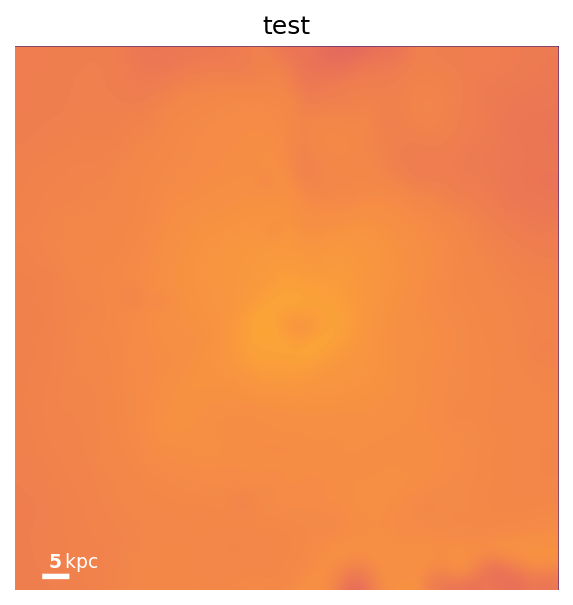

In [19]:
fig, ax = plt.subplots(1, 1, figsize=[4.8,4.8], dpi=150)
tmin=3
tmax=8

gasStudio.render(ax=ax, 
                 weight_name='Masses',
                 quantity_name='logT',
                 min_quantity=tmin,
                 max_quantity=tmax,
                 cmap='plasma',
                 use_metadata=False)

plt.title('test')
plt.show()